In [1]:
import pandas as pd
df_degradability = pd.read_csv('/home/cbe/AI4CHEM/polymer_design/ReLeaSE/data/degradabilty_result_of_polyinfo.csv')

In [2]:
polyinfo = pd.read_excel('polyinfo homopolymer.xlsx')

In [3]:
polymer_name_id_dict = dict(zip(polyinfo['polymer_name'], polyinfo['polymer_id']))
polymer_id_name_dict = dict(zip(polyinfo['polymer_id'],polyinfo['polymer_name']))

In [4]:
df_degradability['name'] = df_degradability['PID'].map(polymer_id_name_dict)

In [5]:
df_degradability

,PID,Degradability,name
0,P342466,1.971466,poly{1-[3-(4-benzoyl-3-hydroxyphenoxy)-2-hydro...
1,P070058,1.822279,"poly[3,3-bis(hydroxymethyl)oxetane]"
2,P332335,1.822115,"poly{[4,5-bis(hydroxymethyl)cyclopentane-1,3-d..."
3,P040236,1.817512,poly(glyceryl methacrylate)
4,P402272,1.780372,"poly[iminoglutarylimino(3,3'-dihydroxybiphenyl..."
...,...,...,...
4572,P342159,-0.024667,poly(diisopropyl fumarate)
4573,P462093,-0.052890,poly{bis[(4-(methoxycarbonyl)phenoxy]phosphazene}
4574,P342400,-0.108607,poly(isopropyl crotonate)
4575,P040223,-0.210304,"poly(N,N-diisopropylacrylamide)"


In [6]:
df_name= pd.read_excel('RESULT.xlsx')

In [7]:
polymer_name_smiles_dict = dict(zip(df_name['polymer_name'], df_name['SMILES']))
polymer_smiles_name_dict = dict(zip(df_name['SMILES'],df_name['polymer_name']))

In [8]:
df_degradability['smiles'] = df_degradability['name'].map(polymer_name_smiles_dict)

In [9]:
df_degradability

,PID,Degradability,name,smiles
0,P342466,1.971466,poly{1-[3-(4-benzoyl-3-hydroxyphenoxy)-2-hydro...,*CC(C(=O)OCC(COc1ccc(c(c1)O)C(=O)c1ccccc1)O)(C)*
1,P070058,1.822279,"poly[3,3-bis(hydroxymethyl)oxetane]",*OCC(CO)(CO)C*
2,P332335,1.822115,"poly{[4,5-bis(hydroxymethyl)cyclopentane-1,3-d...",*C=CC1CC(C(C1CO)CO)*
3,P040236,1.817512,poly(glyceryl methacrylate),OCC(COC(=O)C(C*)(C)*)O
4,P402272,1.780372,"poly[iminoglutarylimino(3,3'-dihydroxybiphenyl...",*Nc1ccc(cc1O)c1ccc(c(c1)O)NC(=O)CCCC(=O)*
...,...,...,...,...
4572,P342159,-0.024667,poly(diisopropyl fumarate),CC(OC(=O)C(*)*)C
4573,P462093,-0.052890,poly{bis[(4-(methoxycarbonyl)phenoxy]phosphazene},COC(=O)c1ccc(cc1)OP(=N*)(Oc1ccc(cc1)C(=O)OC)*
4574,P342400,-0.108607,poly(isopropyl crotonate),CC(OC(=O)C(C(C)*)*)C
4575,P040223,-0.210304,"poly(N,N-diisopropylacrylamide)",*CC(C(=O)N(C(C)C)C(C)C)*


In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem
def get_maccs_fingerprint(smi):
    try:
        mol=Chem.MolFromSmiles(smi)
        fps = AllChem.GetMACCSKeysFingerprint(mol)
    except:
        fps=None
    return fps

def get_morgan_fp(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
        fp=list(fp)
    except:
        fp=None
    return fp

def get_Morgan_fingerprint_frequency(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        info={}
        fp = AllChem.GetMorganFingerprintAsBitVect(mol,3,nBits=2048,bitInfo=info)
        key=[key for key in info.keys()]
        frq=[len(value) for value in info.values()]
        new_info={key: value for key, value in zip(key, frq)}
        mff=[0] * len(list(fp))
        for key, value in new_info.items():
            mff[key] = value
    except:
        mff=None
    return mff

In [11]:
df_degradability['maccs_fp'] = df_degradability['smiles'].apply(get_maccs_fingerprint)
df_degradability['morgan_fp'] = df_degradability['smiles'].apply(get_morgan_fp)
df_degradability['morgan_fp_with_freq'] = df_degradability['smiles'].apply(get_Morgan_fingerprint_frequency)

In [12]:
df_degradability =df_degradability.dropna()

In [13]:
df_degradability.head()

,PID,Degradability,name,smiles,maccs_fp,morgan_fp,morgan_fp_with_freq
0,P342466,1.971466,poly{1-[3-(4-benzoyl-3-hydroxyphenoxy)-2-hydro...,*CC(C(=O)OCC(COc1ccc(c(c1)O)C(=O)c1ccccc1)O)(C)*,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,P070058,1.822279,"poly[3,3-bis(hydroxymethyl)oxetane]",*OCC(CO)(CO)C*,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,P332335,1.822115,"poly{[4,5-bis(hydroxymethyl)cyclopentane-1,3-d...",*C=CC1CC(C(C1CO)CO)*,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,P040236,1.817512,poly(glyceryl methacrylate),OCC(COC(=O)C(C*)(C)*)O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,P402272,1.780372,"poly[iminoglutarylimino(3,3'-dihydroxybiphenyl...",*Nc1ccc(cc1O)c1ccc(c(c1)O)NC(=O)CCCC(=O)*,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [36]:
#polymer_degradability=df_degradability[['smiles','Degradability']]

In [38]:
#polymer_degradability.to_csv('polymer_degradability.csv',index=False)

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_degradability['maccs_fp'].tolist(), df_degradability['Degradability'].tolist(), test_size=0.1, random_state=36)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print('MSE:', mse)
print('R2 score:', r2)
print('MAE:',mae)

MSE: 0.015091131381155375
R2 score: 0.7610864406141297
MAE: 0.08651080536050217


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_degradability['morgan_fp'].tolist(), df_degradability['Degradability'].tolist(), test_size=0.1, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
#mape=mean_absolute_percentage_error(y_test,y_pred)
print('MSE:', mse)
print('R2 score:', r2)
print('MAE:',mae)
#print('MAPE',mape)

MSE: 0.01914954974830833
R2 score: 0.7461155917725077
MAE: 0.09514249466809338


In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_degradability['morgan_fp_with_freq'].tolist(), df_degradability['Degradability'].tolist(), test_size=0.05, random_state=36)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
#mape=mean_absolute_percentage_error(y_test,y_pred)
print('MSE:', mse)
print('R2 score:', r2)
print('MAE:',mae)
#print('MAPE',mape)

MSE: 0.01467364248660814
R2 score: 0.779582365095811
MAE: 0.07816768399132816


In [19]:
import pickle
# with open('rf_mfp_degradability.pkl', 'wb') as f:
#     pickle.dump(rf, f)

0.779582365095811


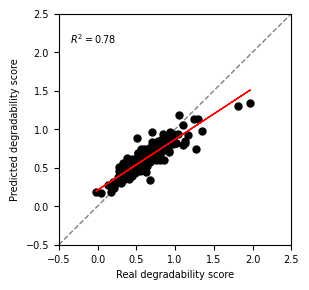

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
def R2(target, predict):
    SSE = sum((target - predict) ** 2)
    SST = sum((target - (target).mean()) ** 2)
    return 1 - (SSE / SST)

x = np.array(y_test)
y = np.array(y_pred)

fig, ax = plt.subplots(figsize=(3, 3), dpi=100)
    # 绘制1:1对角线，linewidth线的粗细，ls线的格式，c线的颜色，
ax.plot((0, 1), (0, 1), linewidth=1, transform=ax.transAxes, ls='--', c='k', label="1:1 line", alpha=0.5)
    # 绘制点，'o'点的形状，点的颜色，markersize点的大小
ax.plot(x, y, 'o', c='black', markersize=5)
 
    # polyfit(x, y, 1)，1代表线性拟合
    # parameter返回的是线性拟合线的斜率和截距
parameter = np.polyfit(x, y, 1)
f = np.poly1d(parameter)
ax.plot(x, f(x), 'r-', lw=1)
 
    # 计算决定系数R
r2 = R2(x,y)
print(r2)
 
    # 那个框框的设置
bbox = dict(boxstyle="round", fc='1', alpha=0.)
bbox = bbox
    # 在图上安放R2和拟合曲线公式，0.05和0.87是位置偏移量，自己调试
# plt.text(0.05, 0.87, "$R^2=%.2f$\n$y=%.2fx+%.2f$" % ((r2), parameter[0], parameter[1]),
#              transform=ax.transAxes, size=7, bbox=bbox)

plt.text(0.05, 0.87, "$R^2=%.2f$" % ((r2)),
             transform=ax.transAxes, size=7, bbox=bbox)
 
    # 横轴的设置
ax.set_xlabel('Real degradability score', fontsize=7)
ax.set_ylabel("Predicted degradability score", fontsize=7)
 
    # 设置图片title
ax.tick_params(labelsize=7)
#ax.set_title("prediction of tensile stress strength at yield", fontsize=7)
 
x_major_locator = MultipleLocator(0.5)
ax.xaxis.set_major_locator(x_major_locator)
y_major_locator = MultipleLocator(0.5)
ax.yaxis.set_major_locator(y_major_locator)
    # 坐标轴
ax.set(xlim=(-0.5, 2.5), ylim=(-0.5, 2.5))
 
    # plt.savefig("out.png", bbox_inches='tight')
#plt.show()
plt.savefig('degradability prediction.png',dpi=300)
